### Hyperopt distributions


The stochastic expressions currently recognized by hyperopt's optimization algorithms are:

*hp.randint(label, upper)*

- Returns a random integer in the range [0, upper). The semantics of this distribution is that there is no more correlation in the loss function between nearby integer values, as compared with more distant integer values. This is an appropriate distribution for describing random seeds for example. If the loss function is probably more correlated for nearby integer values, then you should probably use one of the "quantized" continuous distributions, such as either quniform, qloguniform, qnormal or qlognormal.

<BR>

*hp.uniform(label, low, high)*
- Returns a value uniformly between low and high.
- When optimizing, this variable is constrained to a two-sided interval.

<BR>
    
*hp.quniform(label, low, high, q)*

Returns a value like round(uniform(low, high) / q) * q
Suitable for a discrete value with respect to which the objective is still somewhat "smooth", but which should be bounded both above and below.

<BR>
    
*hp.loguniform(label, low, high)*

- Returns a value drawn according to exp(uniform(low, high)) so that the logarithm of the return value is uniformly distributed.
- When optimizing, this variable is constrained to the interval [exp(low), exp(high)].

<BR>
    
*hp.qloguniform(label, low, high, q)*
    
- Returns a value like round(exp(uniform(low, high)) / q) * q
- Suitable for a discrete variable with respect to which the objective is "smooth" and gets smoother with the size of the value, but which should be bounded both above and below.

<BR>
    
*hp.normal(label, mu, sigma)*

- Returns a real value that's normally-distributed with mean mu and standard deviation sigma. When optimizing, this is an unconstrained variable.

<BR>

*hp.qnormal(label, mu, sigma, q)*

- Returns a value like round(normal(mu, sigma) / q) * q
- Suitable for a discrete variable that probably takes a value around mu, but is fundamentally unbounded.

<BR>
    
*hp.lognormal(label, mu, sigma)*

- Returns a value drawn according to exp(normal(mu, sigma)) so that the logarithm of the return value is normally distributed. When optimizing, this variable is constrained to be positive.

<BR>
    
*hp.qlognormal(label, mu, sigma, q)*

- Returns a value like round(exp(normal(mu, sigma)) / q) * q
- Suitable for a discrete variable with respect to which the objective is smooth and gets smoother with the size of the variable, which is bounded from one side.

<BR>
    
*hp.choice(label, options)*
- Returns one of the options, which should be a list or tuple. The elements of options can themselves be [nested] stochastic expressions. In this case, the stochastic choices that only appear in some of the options become conditional parameters.

### Visualising the data distributions

In [2]:
from hyperopt import hp

In [90]:
from hyperopt.pyll.stochastic import sample
import matplotlib.pyplot as plt

def samples_for_space(space, iterations=1000):
    samples = []

    for _ in range(iterations):
        samples.append(sample(space))
    return samples

def plot_samples(samples, bins):
    plt.hist(samples, bins = bins, edgecolor = 'black'); 
    plt.xlabel('x'); plt.ylabel('Frequency'); plt.title('Domain Space');

#### randint

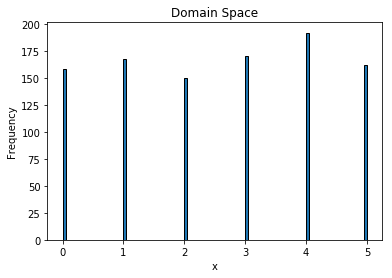

In [18]:
# Create the domain space
space = hp.randint('x', 6)

samples = samples_for_space(space)
plot_samples(samples, 100)

#### uniform

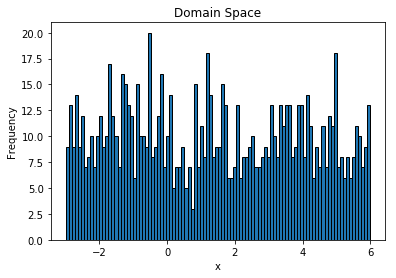

In [9]:
space = hp.uniform('x', -3, 6)

samples = samples_for_space(space)
plot_samples(samples, 100)

#### quniform

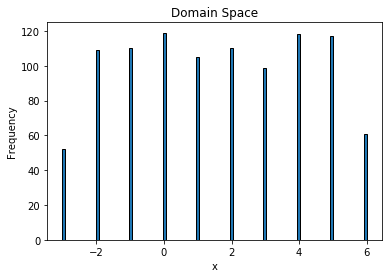

In [14]:
space = hp.quniform('x', -3, 6, 1)

samples = samples_for_space(space)
plot_samples(samples, 100)

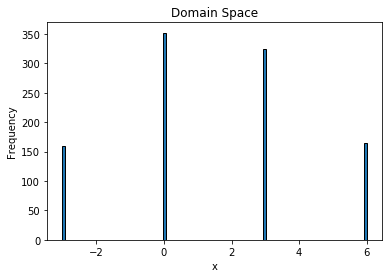

In [15]:
space = hp.quniform('x', -3, 6, 3)

samples = samples_for_space(space)
plot_samples(samples, 100)

#### loguniform

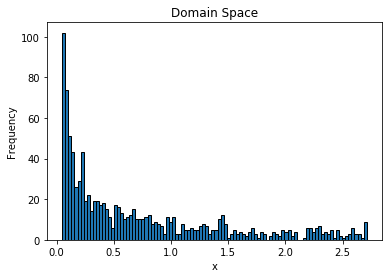

In [24]:
space = hp.loguniform('x', -3, 1) # range from e^-3 to e^+1

samples = samples_for_space(space)
plot_samples(samples, 100)

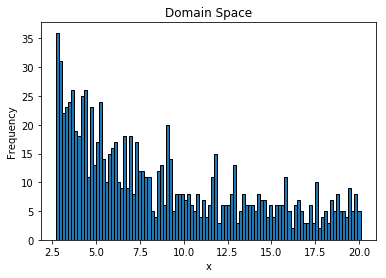

In [31]:
space = hp.loguniform('x', 1, 3) # range from e^+1 to e^+3

samples = samples_for_space(space)
plot_samples(samples, 100)

#### qloguniform

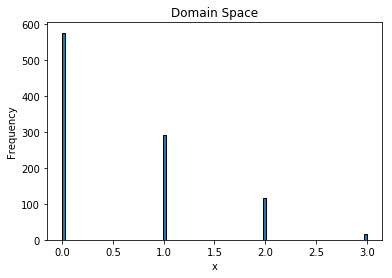

In [40]:
space = hp.qloguniform('x', -3, 1, 1) # range from e^-3 to e^+1

samples = samples_for_space(space)
plot_samples(samples, 100)

#### normal

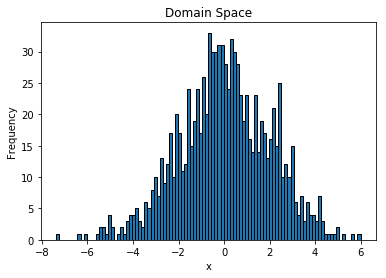

In [47]:
space = hp.normal('x', 0, 2) # (label, mean, standard deviation)

samples = samples_for_space(space)
plot_samples(samples, 100)

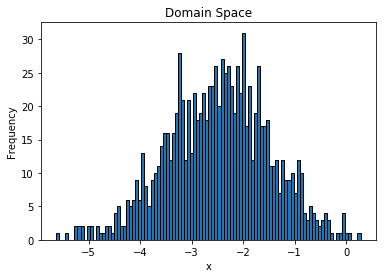

In [52]:
space = hp.normal('x', -2.5, 1)

samples = samples_for_space(space)
plot_samples(samples, 100)

#### qnormal

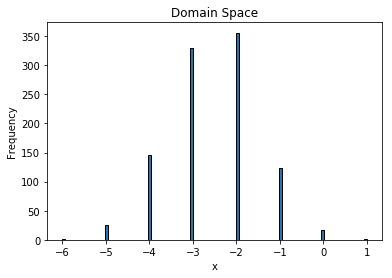

In [57]:
space = hp.qnormal('x', -2.5, 1, 1)

samples = samples_for_space(space)
plot_samples(samples, 100)

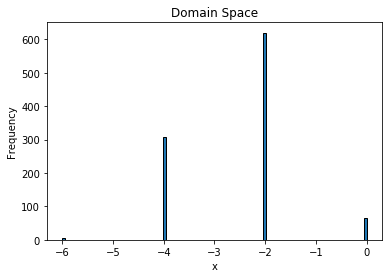

In [59]:
space = hp.qnormal('x', -2.5, 1, 2)

samples = samples_for_space(space)
plot_samples(samples, 100)

#### lognormal

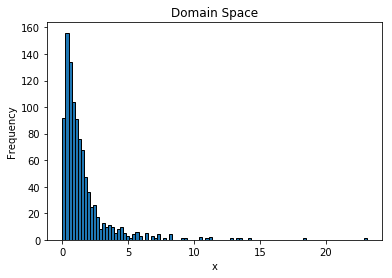

In [78]:
space = hp.lognormal('x', 0, 1) # (label, mean, standard deviation)

samples = samples_for_space(space)
plot_samples(samples, 100)

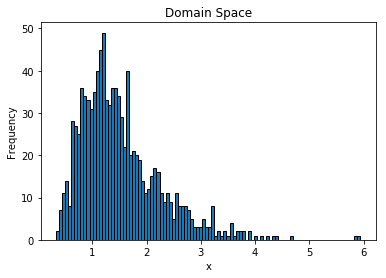

In [84]:
space = hp.lognormal('x', 0.3, 0.5) # (label, mean, standard deviation)

samples = samples_for_space(space)
plot_samples(samples, 100)

#### qlognormal

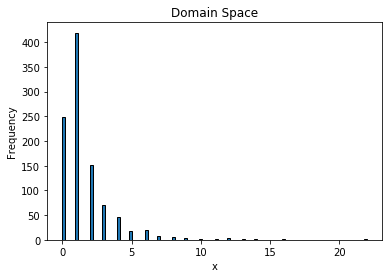

In [86]:
space = hp.qlognormal('x', 0, 1, 1) # (label, mean, standard deviation)

samples = samples_for_space(space)
plot_samples(samples, 100)

#### choice

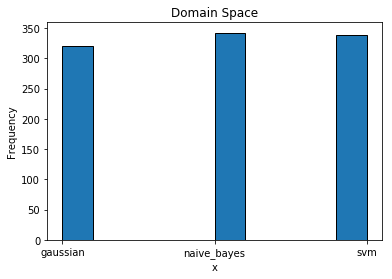

In [91]:
space = hp.choice('x', ['naive_bayes', 'svm', 'gaussian'])

samples = samples_for_space(space)
plot_samples(samples, 10)

In [96]:
space = hp.choice('classifier_type', [
    {
        'type': 'naive_bayes',
    },
    {
        'type': 'svm',
        'C': hp.lognormal('svm_C', 0, 1),
        'kernel': hp.choice('svm_kernel', [
            {'ktype': 'linear'},
            {'ktype': 'RBF', 'width': hp.lognormal('svm_rbf_width', 0, 1)},
            ]),
    },
    {
        'type': 'dtree',
        'criterion': hp.choice('dtree_criterion', ['gini', 'entropy']),
        'max_depth': hp.choice('dtree_max_depth',
            [None, hp.qlognormal('dtree_max_depth_int', 3, 1, 1)]),
        'min_samples_split': hp.qlognormal('dtree_min_samples_split', 2, 1, 1),
    },
    ])

samples = samples_for_space(space, 3)
print(samples)

[{'criterion': 'entropy', 'max_depth': None, 'min_samples_split': 26.0, 'type': 'dtree'}, {'criterion': 'gini', 'max_depth': 24.0, 'min_samples_split': 8.0, 'type': 'dtree'}, {'type': 'naive_bayes'}]
